<a href="https://colab.research.google.com/github/ndtuan10/CS431_L21_KHCL/blob/main/BaiTap/NeuralNetwork_SequentialModel_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BÀI TẬP 3**

**Môn : Các kỹ thuật học sâu và ứng dụng - CS313.L11.KHCL**

# Phân Loại hình ảnh trang phục qua phương pháp deep learning (Fashion MNIST)
Môn : Máy học CS114

Giáo viên : TS.Mai Tiến Dũng

Thành viên :
  + Nguyễn Tuấn Lộc (18521011)
  + Lê Hoàng Long (18521027)
  + Ngô Đức Tuấn (18520186)

Ở đồ án này, chúng ta sẽ xây dựng mô hình mạng Neuron phục vụ cho việc phân loại các kiểu trang phục cơ bản trong cuộc sống, qua đó biết được nhu cầu, sở thích của khách hàng trong việc lựa chọn trang phục.

Các công cụ được sử dụng trong quá trình xây dựng mô hình :
  + Ngôn ngữ lập trình : Python 3
  + Môi trường IDE : Jupyter Notebook , Google Colaboratory
  + Các thư viện :
    - Thư viện máy học : tensorflow 2.0 , keras 2.3
    - Thư viện hỗ trợ : Matplotlib, numpy, pandas



In [ ]:
!rm -rf ./logs/ 

In [ ]:
%load_ext tensorboard
# Thư viện được sử dụng
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
print('''
  Phiên bản của các thư viện :
    + Tensorflow : {0}
    + keras : {1}
    + numpy : {2}
    + matplotlib : {3}
    + pandas : {4}
'''.format(tf.__version__, keras.__version__, np.__version__, matplotlib.__version__, pd.__version__))


## 1/ Trích xuất dữ liệu trang phục Fashion MNIST

Chúng ta sẽ sử dụng dataset về trang phục từ [Fashion_MNIST](https://www.kaggle.com/zalando-research/fashionmnist), chứa khoảng 70,000 ảnh đen trắng phân thành 10 loại. Mỗi một ảnh là một loại quần áo hoặc giày dép với độ phân giải thấp (28 by 28 pixel), như hình minh hoạ bên dưới:
![Image](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

Ngoài ra chúng ta có thể đọc phần mô tả về dataset này thông qua trang [Kaggle](https://www.kaggle.com/search?q=Fashion+MNIST+dataset).

<table>
  <tr><td>
    <img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b> Fashion MNIST Dataset </b> 
  </td></tr>
</table>


Thay vì tải dữ liệu qua website [Kaggle](https://www.kaggle.com/search?q=Fashion+MNIST+dataset) , ta sẽ load dataset trực tiếp từ chính thư viện [keras](https://keras.io/api/datasets/fashion_mnist/) đã được tích hợp sẵn.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Sau khi tải, dữ liệu được trả về với kiểu dữ liệu numpy.ndarray (mảng n chiều) được gán cho 4 biến : 

*train_images* , *train_labels* , *test_images* , *test_labels*.

In [ ]:
type(train_images)

##2/ Khai phá dữ liệu 

Chúng ta khám phá dữ liệu  trước khi huấn luyện mô hình. Câu lệnh sau sẽ cho ta thấy có 60.000 ảnh trong tập huấn luyện, với mỗi ảnh được biểu diễn theo dạng 28x28 pixel:

In [ ]:
train_images.shape

Tương tự, tập huấn luyện cũng có 60.000 nhãn tương ứng:

In [ ]:
len(train_labels)

Mỗi nhãn là một số nguyên từ 0 đến 9:

In [ ]:
train_labels

Ở tập kiểm tra Có 10.000 ảnh , mỗi ảnh cũng được biểu diễn ở dãng 28 x 28 pixel:

In [ ]:
test_images.shape

Và tập kiểm tra cũng chứa 10,000 nhãn:

In [ ]:
len(test_labels)

Tập dữ liệu sau khi được tải sẽ trả về 4 mảng NumPy:

* 2 mảng `train_images` và `train_labels` là *tập huấn luyện*. Mô hình sẽ học từ dữ liệu của 2 mảng này.
* 2 mảng `test_images` vả `test_labels` là *tập kiểm thử*. Sau khi mô hình được huấn luyện xong, chúng ta sẽ chạy thử mô hình với dữ liệu đầu vào từ `test_images` để lấy kết quả, và so sánh kết quả đó với dữ liệu đối ứng từ `test_labels` để đánh giá độ chính xác của mô hình mạng neuron đã tạo.

Mỗi ảnh là một mảng NumPy 2 chiều, 28x28, với mỗi pixel có giá trị từ 0 đến 255. *Nhãn* là một mảng của các số nguyên từ 0 đến 9, tương ứng với mỗi *lớp* quần áo giày dép:

<table>
  <tr>
    <th>Nhãn</th><th>0</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th><th>7</th><th>8</th><th>9</th>
    
  </tr>
  <tr>
    <td>Loại</td>
    <td>Áo thun</td>
    <td>Quần dài</td>
    <td>Áo len</td>
    <td>Váy</td>
    <td>Áo khoác</td>
    <td>Sandal</td>
    <td>Áo sơ mi</td>
    <td>Giày</td>
    <td>Túi xách</td>
    <td>Ủng </td>
  </tr>
</table>

Mỗi ảnh sẽ được gán với một nhãn duy nhất. Vì tên của mỗi nhãn không có trong tập dữ liệu, nên chúng ta có thể định nghĩa ở đây như sau:

In [ ]:
class_names = [
               'Áo thun', 'Quần dài', 'Áo len', 'Váy', 'Áo khoác',
               'Sandal', 'Áo sơ mi', 'Giày', 'Túi xách', 'Ủng'
               ]

##3/ Tiền xử lý dữ liệu

Dữ liệu cần được xử lý trước khi được dùng để huấn luyện mạng neuron. Phân tích ảnh đầu tiên trong tập dữ liệu, chúng ta sẽ thấy các pixel có giá trị từ 0 đến 255:

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap="inferno")
plt.colorbar()
plt.show()

Chúng ta cần xử lý để mỗi một điểm ảnh có giá trị nằm trong khoảng từ 0 đến 1 (tức trong khoảng là 0% đến 100%). Để làm điều này, chúng ta chỉ cần lấy giá trị của pixel chia cho 255. Cần lưu ý rằng việc tiền xử lý này phải được áp dụng đồng thời cho cả *tập huấn luyện* và *tập kiểm thử*:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Để chắc chắn việc tiền xử lý diễn ra chính xác, chúng ta có thể in ra 25 ảnh đầu trong *tập huấn luyện* cùng với tên lớp dưới mỗi ảnh.

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##4/ Xây dựng mô hình

Để xây dựng mạng neuron, chúng tay cần thiết lập các layer của mô hình, và sau đó biên dịch mô hình.

### 4.1Thiết lập các layers

Thành phần cơ bản của một mạng neuron là các *layer*. Các layer trích xuất các điểm đặc biệt từ dữ liệu mà chúng đón nhận. Khi thực hiện tốt, những điểm đặc biệt này mang nhiều ý nghĩa và phục vụ cho toán của chúng ta.

Đa số các mô hình deep learning đều chứa các layer đơn gian được xâu chuỗi lại với nhau. Đa số các layer, ví dụ `tf.keras.layers.Dense`, đều có các trọng số sẽ được học trong quá trình huấn luyện.


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(200, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

Mô hình mạng neuron cơ bản luôn có 3 lớp chính :
+ Lớp Input : Xác định hình dạng dữ liệu đầu vào cho mô hình.
+ Lớp Hidden : Dùng để tính toán , xây dựng kết nối các neuron lại với nhau. Khác với 2 lớp Input, Output được xây dựng, thiết kế cố định dựa trên dataset. Ở lớp này, ta có thể thiết kế nhiều lớp, mỗi lớp có nhiều neuron tuỳ ý. Tuy nhiên khi số lượng hay độ phức tạp ở lớp ẩn càng cao, thì độ chính xác càng tăng, thời gian huấn luyện càng lâu. Ngoài ra khi mô hình ở lớp này quá phức tạp sẽ gây ra hiện tượng quá khớp làm giảm độ chính xác của mô hình. Ngược lại khi mô hình lớp ẩn quá đơn giản, thì các nhãn được phân loại sẽ không có độ chính xác cao .
+ Lớp Output : Các nhãn cần dự đoán . 
<table>
  <tr><td>
    <img src="https://www.tutorialspoint.com/machine_learning/images/artificial_neural_networks.jpg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2.</b> <a href="https://www.tutorialspoint.com/machine_learning/images/artificial_neural_networks.jpg">Minh hoạ mô hình mạng Neuron</a> <br/>&nbsp;
  </td></tr>
</table>

In [ ]:
model.summary()

Trong mô hình mạng neuron được thiết kế như trên, lớp Input , `tf.keras.layers.Flatten`, chuyển đổi định dạng của hình ảnh từ mảng hai chiều (28x28) thành mảng một chiều (28x28 = 784). Công việc của layer này là cắt từng dòng của ảnh, và ghép nối lại thành một dòng duy nhất nhưng dài gấp 28 lần. Lớp  có nhiệm vụ chính là định dạng lại dữ liệu.Sau đây chúng ta sẽ phân tính lần lượt 3 lớp chính của mạng neuron.

+ Lớp Input : Sau khi  được làm "phẳng" (từ mảng 2 chiều thành mảng 1 chiều), phần mạng neuron còn lại gồm một chuỗi hai layer `tf.keras.layers.Dense`. Đây là các layer neuron được kết nối hoàn toàn (mỗi một neuron của layer này kết nối đến tất cả các neuron của lớp trước và sau nó). 

+ Layer `Dense` đầu tiên hay còn gọi là lớp ẩn ( Hidden Layer ) có 128 neuron. 

+ Layer cuối cùng hay còn gọi là lớp Output có 10 nút, với mỗi nút tương đương với mỗi nhãn mà ta đã xác định ở trên bao gồm các giá trị từ *0 đến 10*. Mỗi nút chứa một giá trị cho biết xác suất hình ảnh hiện tại thuộc về một trong 10 lớp, , và tổng các giá trị của 10 nút này là 1 (tương đương 100%)

###4.2 Biên dịch mô hình

Trước khi mô hình có thể được huấn luyện, chúng ta cần thêm các hàm toán học giúp cho việc đánh giá hay làm mô hình đi " đúng hướng ". Các chỉnh sửa này được thêm vào trong bước *biên dịch* của mô hình:

* *Hàm mất mát* — dùng để tính toán "độ sai sót" của mô hình trong quá trình huấn luyện và dự đoán. Chúng ta cần phải làm cho nghiệm của hàm này nhỏ nhất để kiểm soát mô hình đi đúng hướng. (mất mát càng ít, chính xác càng cao).
* *Hàm tối ưu* — Đây là "công cụ" để làm hàm mất mát có nghiệm nhỏ nhất, qua việc cập nhật và chỉnh sửa các tham số có trong hàm mất mát.
* *Thang đo* — dùng để đo đạc độ chính xác qua mỗi quá trình huấn luyện và kiểm tra. Chúng ta sẽ sử dụng phép đo *accuracy*, nhằm nắm được tỉ lệ ảnh được phân loại chính xác.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##5/ Huấn luyện mô hình

Huấn luyện mô hình mạng neuron cần các bước sau:

1. Cung cấp dữ liệu huấn luyện cho mô hình. Trong ví dụ này, dữ liệu huấn luyện năm trong 2 mảng `train_images` và `train_labels`. Ngoài ra chúng ta sẽ trích 30% dữ liệu huấn luyện cho dữ liệu validation để làm tập kiểm tra -> mô hình có tính "Khách quan" .
2. Mô hình sẽ học cách liên kết ảnh với nhãn.
3. Chúng ta sẽ yêu cầu mô hình đưa ra dự đoán từ dữ liệu của tập kiểm thử, trong ví dụ này là mảng `test_images`, sau đó lấy kết quả dự đoán đối chiếu với nhãn trong mảng `test_labels`.


Để bắt đầu huấn luyện, gọi hàm `model.fit`. Hàm này được đặt tên `fit` vì nó sẽ "khớp" mô hình với dữ liệu huấn luyện:

In [ ]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_images, train_labels, validation_split=0.3, epochs=10, batch_size=10,  callbacks=[tensorboard_callback])

Trong quá trình huấn luyện, các số liệu mất mát và chính xác được liệt kê trong từng quá trình lặp (epoch). Sau khi quan sát tới lần lặp cuối cùng, ta thấy độ chính xác là khá cao dao động ở mức 92%.

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

Overfitting xảy ra khi một mô hình máy học hoạt động cực kì chính xác trên dữ liệu huấn luyện nhưng lại rất kém khi được cung cấp các dữ liệu vào mới, tức dữ liệu mà mô hình chưa từng "thấy" trước đây.

Qua 2 biểu đồ trên, ta nhận thấy sự khác biệt trong tỷ lệ chính xác và mất 
mát giữa 2 tập dữ liệu là không quá cao. Do vậy, hiện tượng quá khớp ( Overfitting ) không xảy ra.

##6/ Đánh giá mô hình

Tiếp theo, chúng đánh giá chất lượng của mô hình bằng tập kiểm tra :

In [ ]:
model.evaluate(test_images, test_labels)

Đến thời điểm này, chúng ta thấy rằng tỉ lệ chính xác của mô hình qua đánh giá bằng tập kiểm thử là khá khớp so với tập huấn luyện ở trên (gần 88%). Sự chệnh lệch trong thang đo accuracy của tập kiểm tra với tập huấn luyện là không cao. Do đó hiện tưởng xảy ra *Overfitting* là không cao.

##7/ Demo dự đoán 

Với một mô hình đã được đào tạo, chúng ta có thể dùng nó để đưa ra dự đoán với một số ảnh.

In [ ]:
predictions = model.predict(test_images)

Ở đây, mô hình sẽ dự đoán nhãn cho từng hình ảnh trong bộ thử nghiệm. Hãy xem dự đoán đầu tiên:

In [ ]:
predictions[0]

Trong ví dụ này, dự đoán là một mảng 10 số thực, mỗi số tương ứng với "độ tự tin" của mô hình rằng ảnh đó thuộc về nhãn đó. Chúng ta có thể thấy nhãn nào có độ tư tin cao nhất:

In [ ]:
np.argmax(predictions[0])

Vậy là mô hình tự tin nhất rằng ảnh này là một loại ủng, hoặc `class_names[9]`. Đối chiếu với nhãn trong tập kiểm thử, ta thấy dự đoán này là đúng:

In [ ]:
test_labels[0]

Ta sẽ trực quan hoá dữ liệu để xem các dự đoán trên cả 10 lớp của mô hình.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Chúng ta có thể nhìn vào ảnh 0th, các dự đoán, và mảng dự đoán.
Nhãn dự đoán đúng màu xanh và nhãn sai màu đỏ. Con số là số phần trăm của các nhãn được dự đoán.

In [ ]:
i = 8999
plt.figure(figsize= (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize= (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Thử vẽ biểu đồ với vài ảnh và dự đoán đi kèm. Chú ý thấy rằng mô hình đôi khi dự đoán sai dù điểm tự tin rất cao.

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize= (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Cuối cùng, dùng mô hình để đưa ra dự đoán về một ảnh duy nhất.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

Các mô hình `tf.keras` được tối ưu hóa để đưa ra dự đoán về một *lô* hoặc bộ sưu tập các ví dụ cùng một lúc. Theo đó, mặc dù bạn đang sử dụng một ảnh duy nhất, bạn cần thêm nó vào list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

Dự đoán nhãn cho ảnh này:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` trả về một list của lists — mỗi list cho mỗi ảnh trong lô dữ liệu. Lấy dự đoán cho hình ảnh trong lô:

In [ ]:
np.argmax(predictions_single[0])

In [ ]:
%tensorboard --logdir logs/fit

  **Hình ảnh thực tiễn**

Để thêm thách thức cho mô hình mạng neural, Chúng ta sẽ cho nó phân tích và đưa ra dự đoán cho dữ liệu thực tiễn.
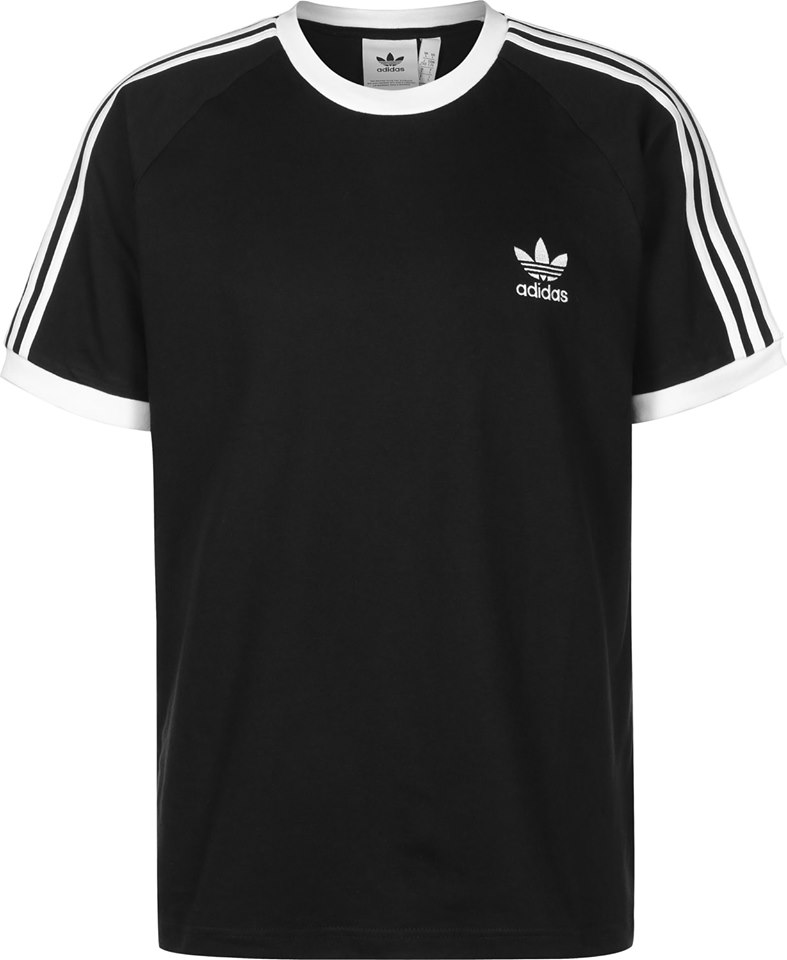

In [ ]:
from PIL import Image, ImageFilter


def imageprepare( file_path):
    im = Image.open('image.png').convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    # print(tva)
    return tva

x=[imageprepare('./image.png')]#file path here
print(len(x))# mnist IMAGES are 28x28=784 pixels
print(x[0])
# converting 784 sized 1d array to 24x24 sized 2d array 
newArr=[[0 for d in range(28)] for y in range(28)]
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1



Ngoài ra chúng ta cần phải điều chỉnh hình dạng, và kiểu dữ liệu ảnh thực phù hợp với lớp input của mô hình.

In [ ]:
arr=np.array(newArr)
print(arr.shape)
arr = (np.expand_dims(arr,0))
print(arr.shape)
print(type(arr))

Gán kết quả vào biến demo

In [ ]:
demo = model.predict(arr)

**Và kết quà làaaaa**

In [ ]:
class_names[np.argmax(demo)]

In [ ]:
plt.imshow(newArr)
plt.show()

In [ ]:
demo = demo.reshape(10)

In [ ]:
  # predictions_array, true_label = demo, class_names[np.argmax(demo)]
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10), demo)
plt.ylim([0, 1])
  # predicted_label = np.argmax(predictions_array)
_ = plt.xticks(range(10), class_names, rotation=45)
  # thisplot[predicted_label].set_color('red')
  # thisplot[true_label].set_color('blue')
plt.show()


  # predictions_array, true_label = predictions_array, true_label[i]
  # plt.grid(False)
  # plt.xticks(range(10))
  # plt.yticks([])
  # thisplot = plt.bar(range(10), predictions_array, color="#777777")
  # plt.ylim([0, 1])
  # predicted_label = np.argmax(predictions_array)

  # thisplot[predicted_label].set_color('red')
  # thisplot[true_label].set_color('blue')

# Tài Liệu Tham Khảo

[1] Aurélien Géron, Hands-On Machine Learning With Scikit-learn, Keras And Tensorflow, 2d Edition

[2] [Dr.Daniel Bell - Epochs In Neural Network](https://radiopaedia.org/articles/epoch-machine-learning#:~:text=An%20epoch%20is%20a%20term,of%20data%20is%20very%20large)

[3] [Cross-Entropy](https://machinelearningcoban.com/2017/02/17/softmax/#-cross-entropy)

[4] [ReLU](https://blog.vietanhdev.com/posts/2019-09-23-cac-ham-kich-hoat-activation-function-trong-neural-networks/)

[5] [Adam Optimizer](https://viblo.asia/p/thuat-toan-toi-uu-adam-aWj53k8Q56m)

[6] [Các thư viện machine learning trong keras](https://thorpham.github.io/blog/2018/05/25/keras/?fbclid=IwAR1RvfDcuQThZt9SRYNrGPI_hJ66Y__o6cnTe9ik_oQ1mpoDBD-wD9AB_oQn)


